<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/snapshotUltrafastImaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Snapshot temporal imaging

## David Brady
## University of Arizona
## February 2024

### libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})


## Background

We consider measurement of ultrafast signals using time integrating detectectors. Our general goal is to create the device as shown below. We allow for the possibility that a temporal reference pulse is inserted into the device, the goal is to characterize the transient space-time signal in a single snapshot. This challenge has deep relationships both with holography and phase retrieval. One can imagine that the reference is a holographic reference used to chacterize the unknown signal, one can similary model the process of recovering the unknown signal from time averaged intensity measurements as phase retrieval.


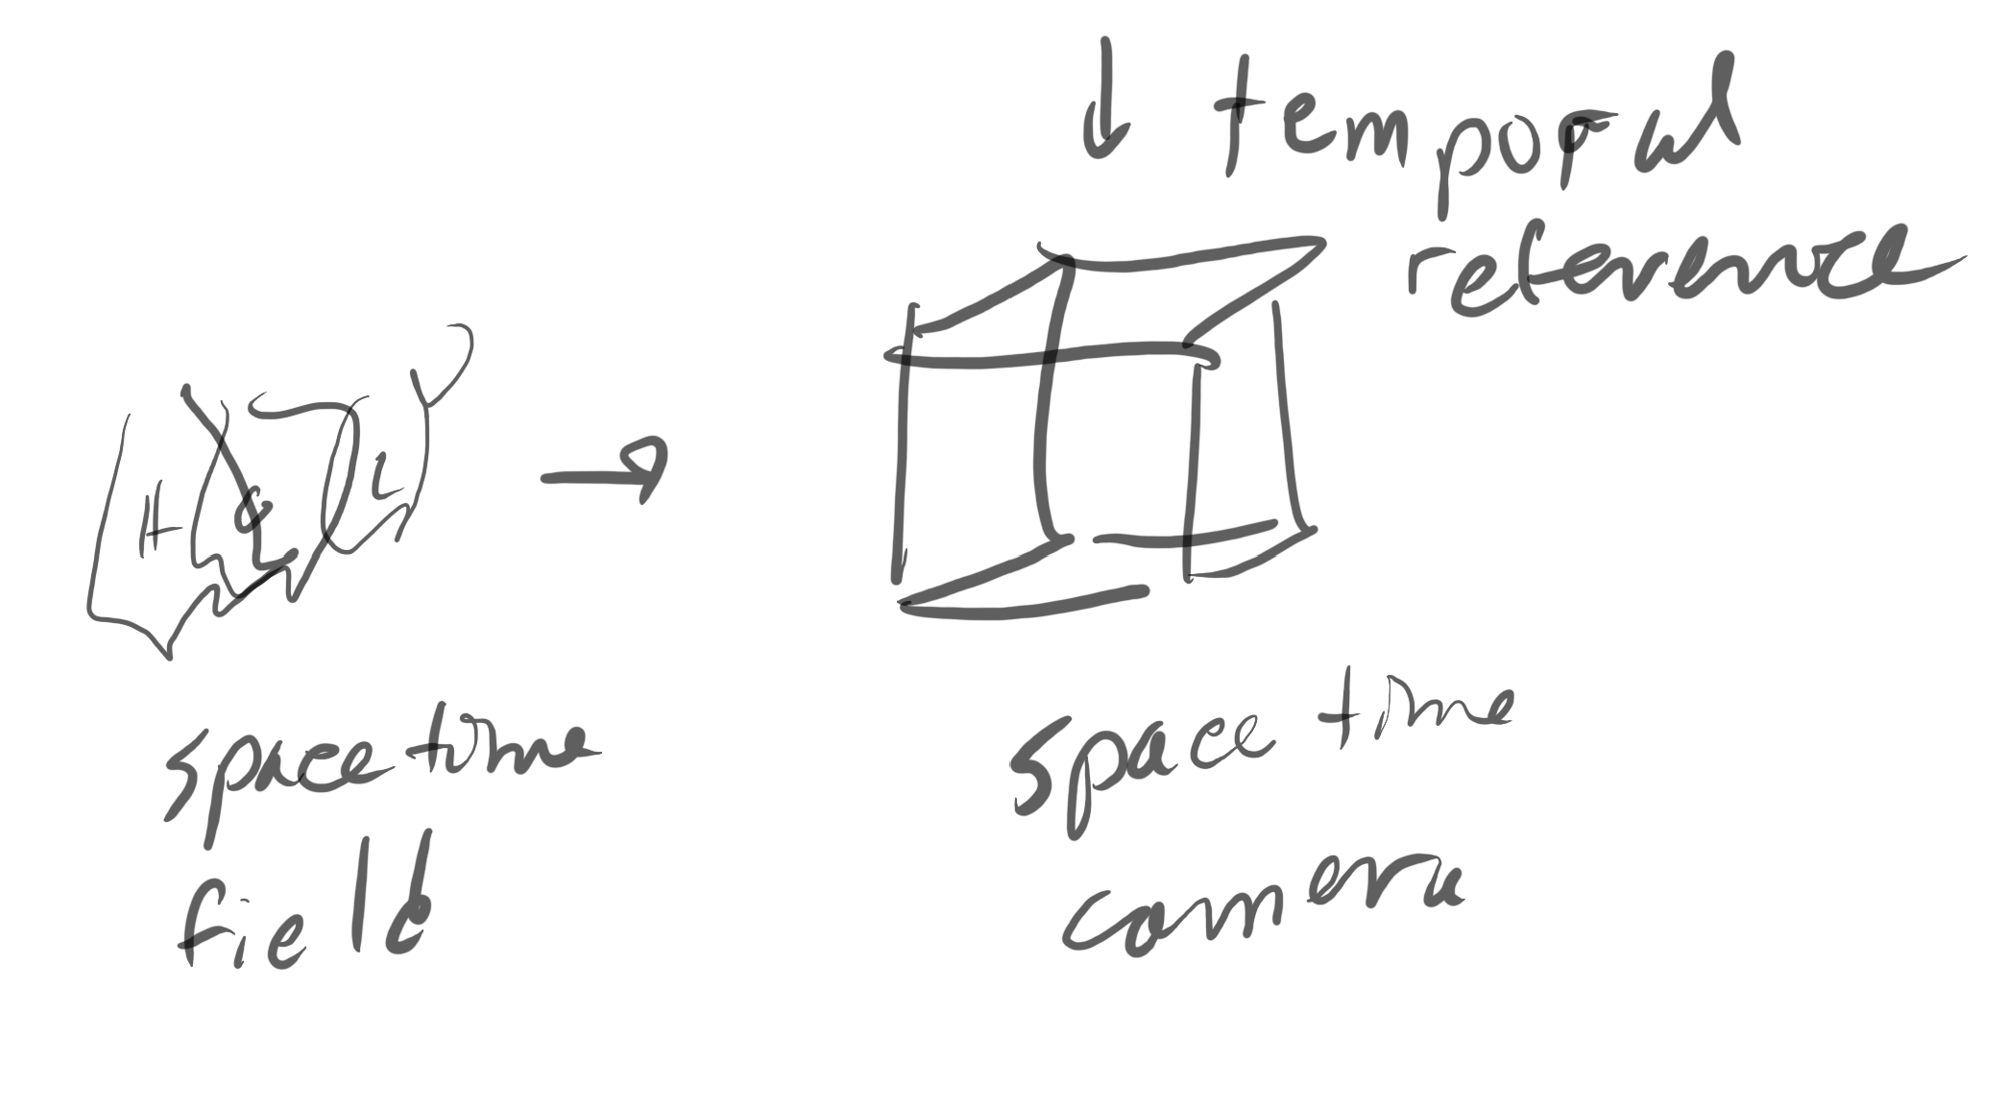

The holographic perspective on the challenge is also closely related to optical coherence tomography, which uses interferometry to characterize the structure of retroreflected signals. OCT may be regarded as a multiple pulse method for characterizing a repetitive space time signal. It is known from OCT that frequency selective encodings have better SNR. One expects that a similar result may apply here.

## One dimensional temporal signal characterization

The problem is particularly straightforward if the space-time field is just a 1D temporal signal. This was explored using colliding pulses in Purchase, Kenneth G., David J. Brady, and Kelvin Wagner. "Time-of-flight cross correlation on a detector array for ultrafast packet detection." Optics letters 18.24 (1993): 2129-2131.Here is the sensor concept from that paper:

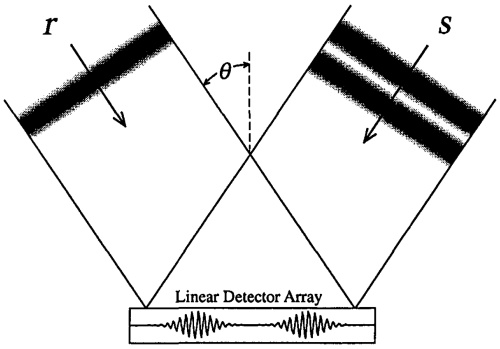

With colliding pulses, the detected signal is
$$
\begin{array}{rl}
g(x)&=\int |f(t-\frac{x}{c})+r(t+\frac{x}{c})|^2 dt\\
&=\int |f|^2 dt +\int |r|^2 dt + \int f(t)r^\ast (t +2 \frac{x}{c})dt +\int f^\ast (t)r(t +2 \frac{x}{c})dt
\end{array}
$$
where $f(t)$ is the unknown signal and $r(t)$ is the reference pulse.

The signal to noise ratio for this case depends on the fringe visibility. There will be a region where the pulses overlap, which will have good signal to noise, but the signal as a whole rides on the DC terms, which substantially degrade SNR.

An alternative strategy involves inserting $f(t)$ into a spectrometer and then measure the signal. A spectrometer maps the signal onto its spectrum ${\hat f}(\nu)$, but ${\hat f}(\nu)$ can be mapped by a grating onto a spatial distribution. The advantage here is that there is no integral over the full spectrum at each measurement point. The detected signal is
$$
\begin{array}{rl}
g(x)&= \int |{\hat f}(\nu-\alpha x)+{\hat r}(\nu -\alpha x)|^2 h(\nu - \alpha x) d\nu\\
&\approx |{\hat f}(\nu=\alpha x)|^2  +|{\hat r}(\nu=\alpha x)|^2  +  {\hat f}(\nu=\alpha x){\hat r}^\ast (\nu=\alpha x) +{\hat f}^\ast (\nu=\alpha x){\hat r} (\nu=\alpha x)
\end{array}
$$
where $h(\nu)$ is the impulse response of the spectrometer, deterimining the spectral resolution. This approach improves the SNR relative to colliding pulses in proportion to the product of the spectral resolution and the time window. Varying the phase of the reference on parallel detections enable snapshot isolation of the unknown signal.

The phase of the reference spectrum is varied by temporally delaying it. If the reference is interfered with several delays simulateously, one may rigorously recover ${\hat f}(\nu )$ in a snapshot.


Diverse hybrid or multiscale versions of this approach may be imagined. One may imagine, for example, integrating over filter functions operating on the spectrum.

An alternative approach is to attempt to estimate $f(t)$ from the spectrum $|{\hat f}(\nu )|^2$. This is phase retrieval. If $f(t)$ is constrained, for example to have minimum temporal extent, then it may be possible to recover $f(t)$ from standard phase retrieval algorithms. One form of constraint assumes that we use a reference to capture ${\hat f}(\nu )$ for some specific set of frequencies. We then known ${\hat f}(\nu )$ at some points and $|{\hat f}(\nu )|^2$ at all points. Iterative phase retrieval or neural processing recovers the full signal from these samples.

Suppose, for example, $f(t)= \cos (0.001 t^2)e^{-\frac{t^2}{10000}} e^{2\pi \nu_o t}$ for $t$ in fs. This is an approximately 100 fs signal with a maximum period of around 1.6 fs. The envelope of the signal looks like this.

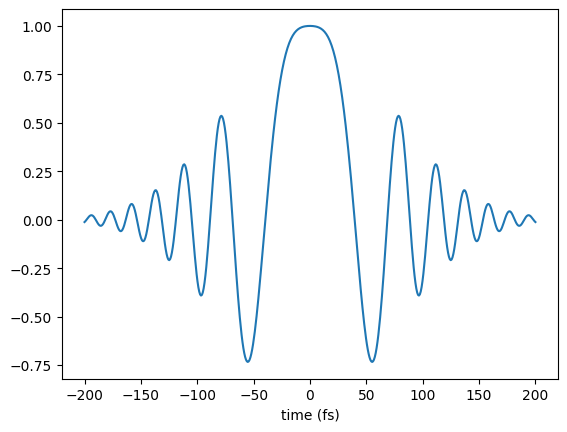

In [ ]:
tr=np.linspace(-200,200,512)
fp=np.cos(.001*t**2)*np.exp(-t**2/10000)
plt.plot(tr,fp)
plt.xlabel('time (fs)')
plt.savefig('pulse.pdf')

Suppose that $r(t)=e^{-\frac{t^2}{10}}$. The spectra are plotted below


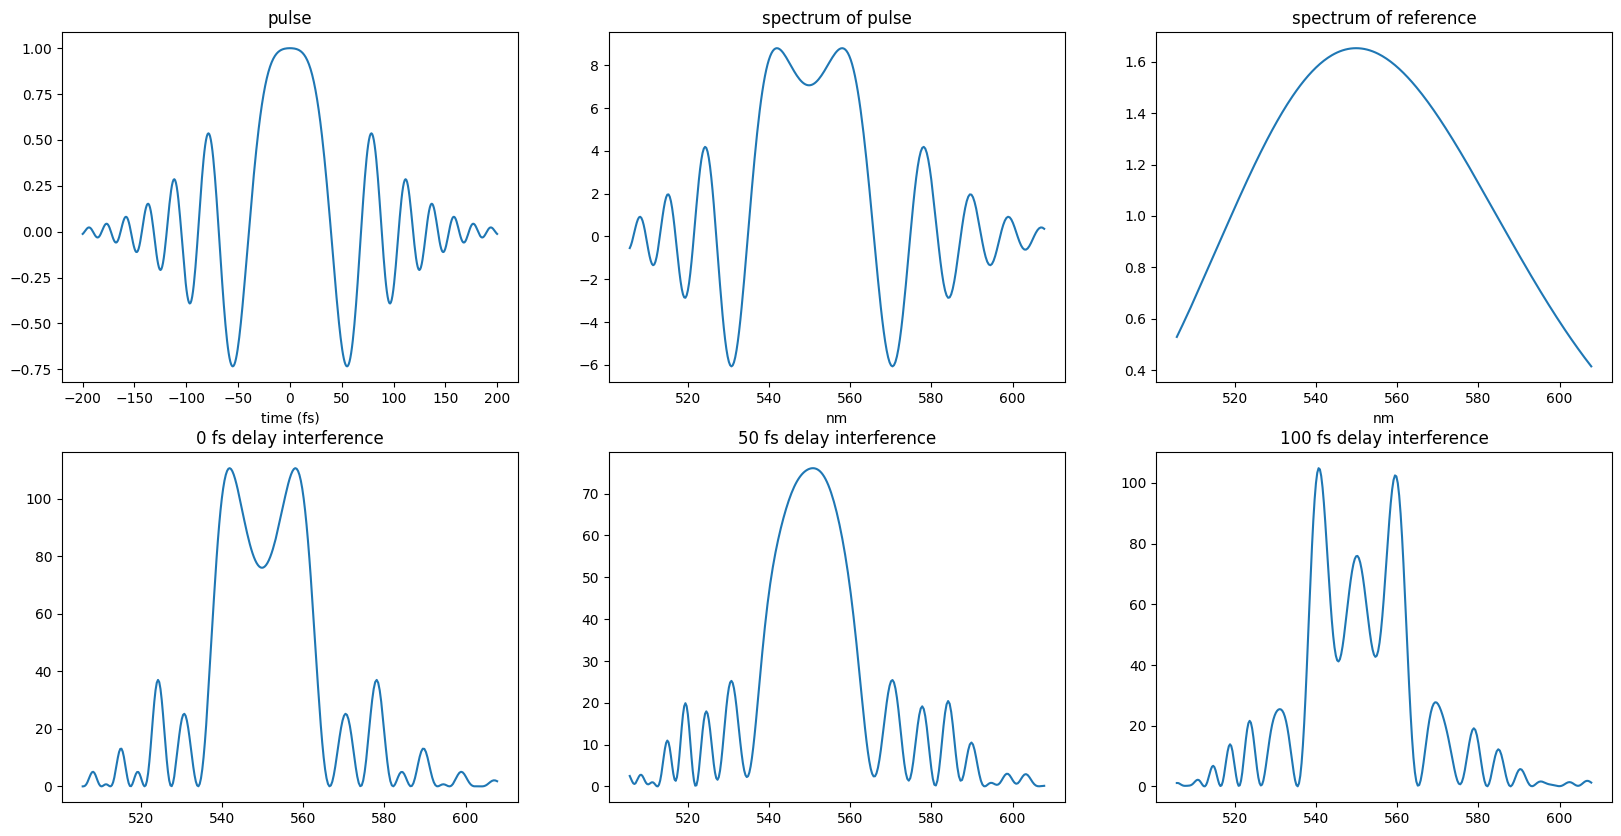

In [ ]:
t=np.linspace(-1500,1500,512)
f=np.cos(.001*t**2)*np.exp(-t**2/10000)
r=np.exp(-t**2/30)
dt=t[2]-t[1]
c=299792458*10**(-6) # nanometers per fs
nu=np.linspace(-.5/dt,.5/dt,512)
lam=c/(nu+c/550)
f_nu=np.fft.fftshift(np.fft.fft(np.fft.fftshift(f)))
r_nu=np.fft.fftshift(np.fft.fft(np.fft.fftshift(r)))
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.plot(tr,fp)
plt.xlabel('time (fs)')
plt.title('pulse')
plt.subplot(2,3,2)
plt.plot(lam[100:400],np.real(f_nu[100:400]))
plt.xlabel('nm')
plt.title('spectrum of pulse')
plt.subplot(2,3,3)
plt.plot(lam[100:400],np.real(r_nu[100:400]))
plt.xlabel('nm')
plt.title('spectrum of reference')
#
dt=0
mr=np.exp(-1j*2*np.pi*dt*nu)*r_nu
plt.subplot(2,3,4)
plt.plot(lam[100:400],np.abs(f_nu[100:400]+mr[100:400])**2)
plt.title('0 fs delay interference')
dt=50
mr=np.exp(-1j*2*np.pi*dt*nu)*r_nu
plt.subplot(2,3,5)
plt.plot(lam[100:400],np.abs(f_nu[100:400]+mr[100:400])**2)
plt.title('50 fs delay interference')
dt=100
mr=np.exp(-1j*2*np.pi*dt*nu)*r_nu
plt.subplot(2,3,6)
plt.plot(lam[100:400],np.abs(f_nu[100:400]+mr[100:400])**2)
plt.title('100 fs delay interference')
plt.savefig('spectralHolograpy.pdf')

## Spectral Holography

Assume we have a signal of the form $e^{2\pi i \nu_ot  t}f(t)$ and a reference
 $e^{2\pi i \nu_ot  t}r(t- \tau_r)$. The power spectral density is
 $$
S(\nu) = |{\hat f}(\nu - \nu_o)|^2+ |{\hat r}(\nu - \nu_o)|^2+ e^{2\pi i(\nu-\nu_o)\tau_r} {\hat f}(\nu - \nu_o){\hat r}^\ast(\nu - \nu_o)+
e^{-2\pi i(\nu-\nu_o)\tau_r} {\hat f}^\ast (\nu - \nu_o){\hat r}(\nu - \nu_o)
 $$


As a second example, let's suppose that the signal is a train of pulses $\sum p(t-\Delta_i)$. Let's assume that each pulse is 50 fs long and the duration of the signal is 1 ps. Suppose that we interfer this pulse train with a reference pulse $r(t)=p(t-\tau_r)$.

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


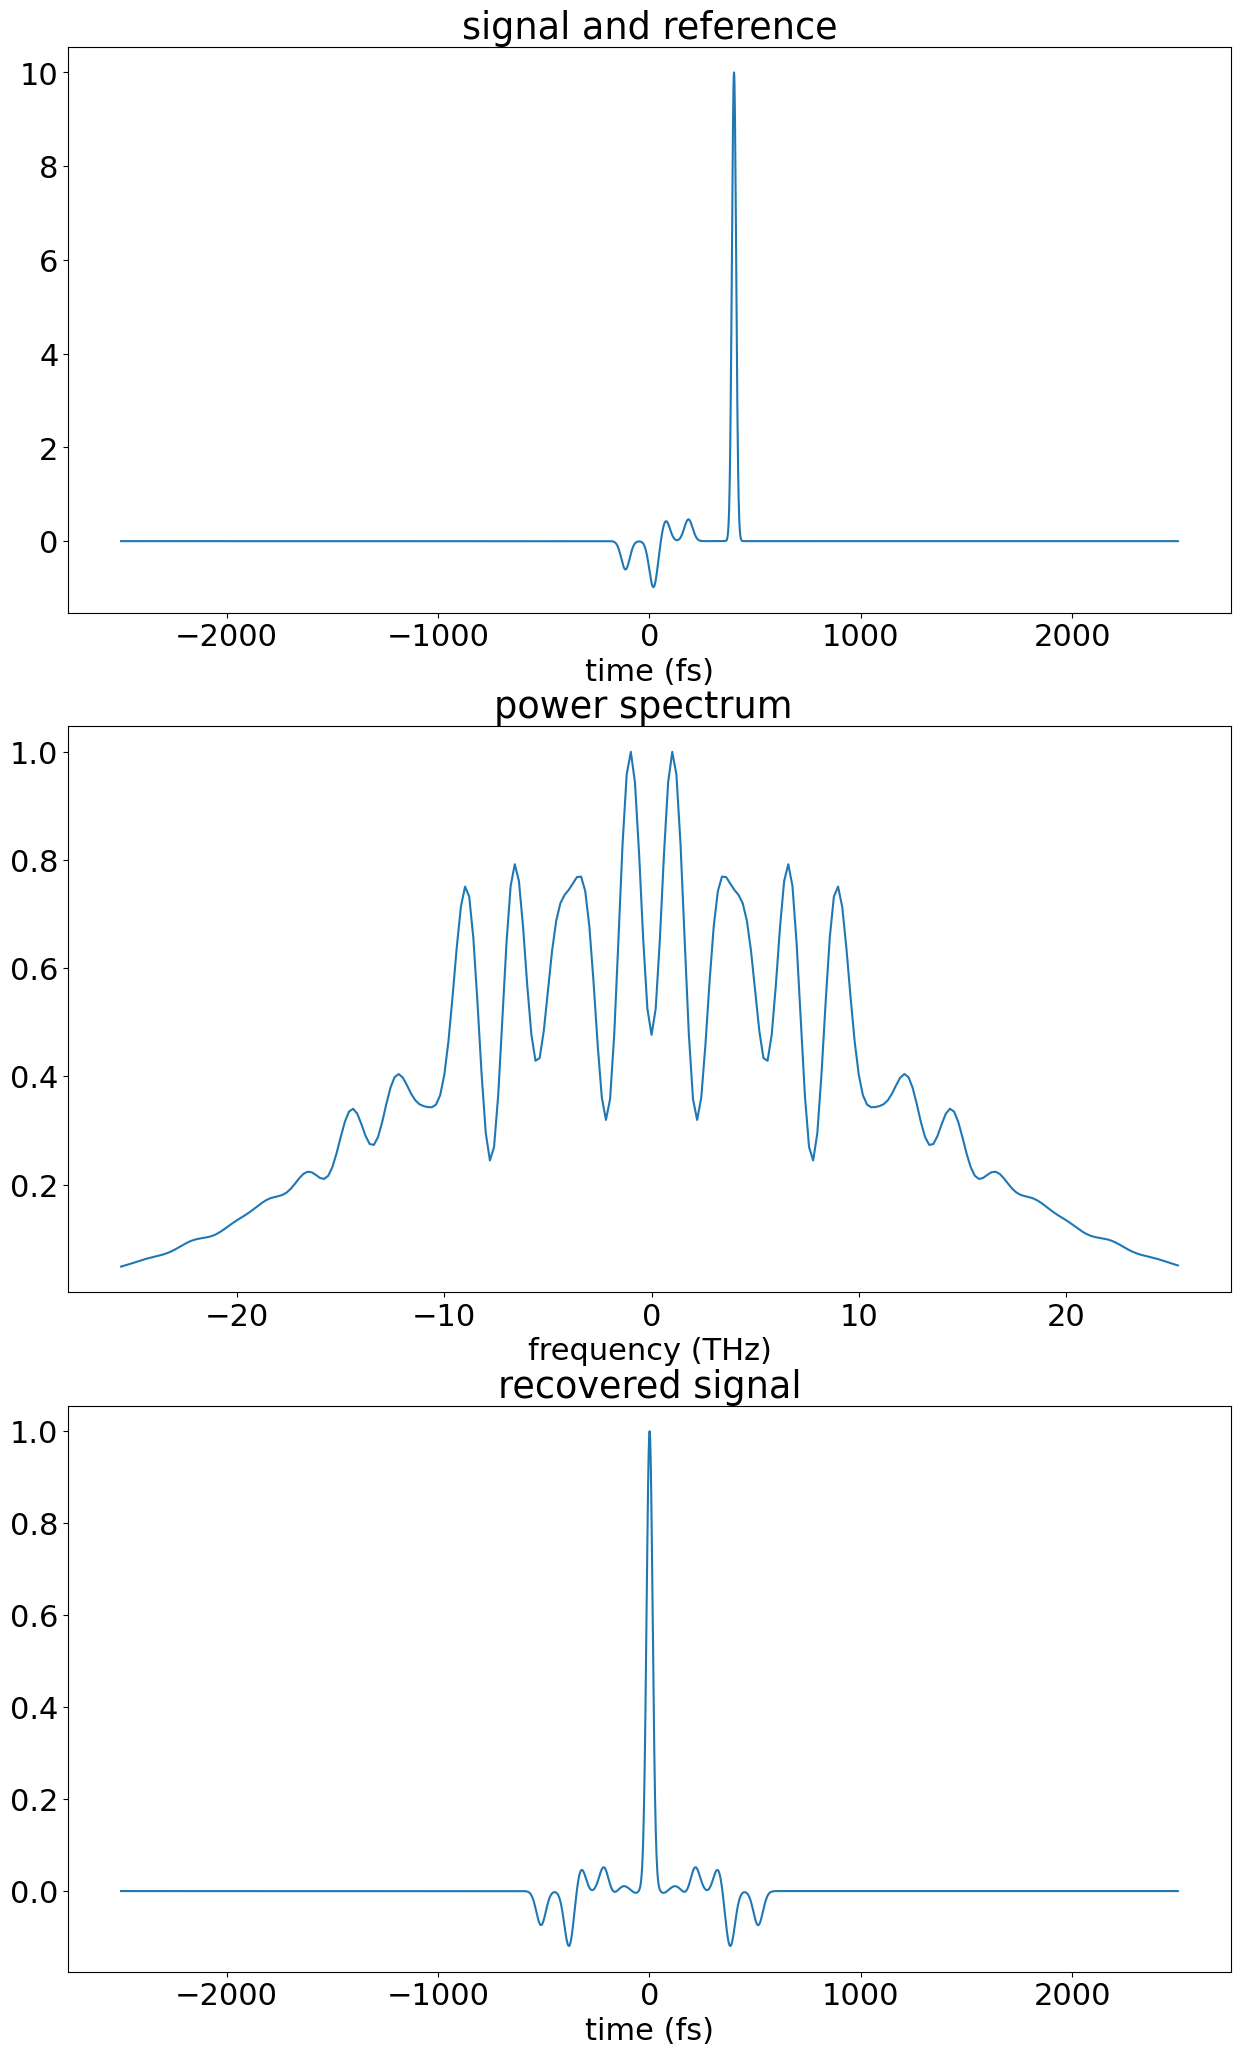

In [6]:
plt.figure(figsize=(15,25))
np.random.seed(4)
N=4096
def p(t, sigma):
  #pulse as a function of time for width in fs sigma
    return np.exp(-(t**2)/(2*sigma**2))
t=np.linspace(-2500,2500,N)
r=10*p(t-400,10)
times = np.random.uniform(-200, 200, 6)
f=r
for pop in range(6):
    f=f+2*(np.random.rand()-.5)*p(t-times[pop],20)
plt.subplot(3,1,1)
plt.plot(t,f)
plt.xlabel('time (fs)')
plt.title('signal and reference')
u=1000*np.fft.fftshift(np.fft.fftfreq(N,t[2] - t[1]))
s=np.abs(np.fft.fftshift(np.fft.fft(np.fft.fftshift(f))))**2
plt.subplot(3,1, 2)
plt.plot(u[np.int32(N/2-128):np.int32(N/2+128)],s[np.int32(N/2-128):np.int32(N/2+128)]/np.max(s))
plt.xlabel('frequency (THz)')
plt.title('power spectrum ')
recoveredSig=np.fft.fftshift(np.fft.ifft(np.fft.fftshift(s)))
recoveredSig=recoveredSig/np.max(recoveredSig)
plt.subplot(3,1,3)
plt.plot(t,recoveredSig)
plt.xlabel('time (fs)')
plt.title('recovered signal')
plt.savefig('spectralHolo.pdf')


## Snapshot Temporal Imaging by Snapshot Spectral imaging

One particularly simple strategy for snapshot temporal imaging is to simply combine a reference signal with a snapshot spectral imager. For the signal
$$f(x,t)+ r(t)$$
A spectral imager measures
$$|{\hat f}(x,\nu )+{\hat r}(\nu)|^2$$
If one meausures with multiple phase shifts or uses signal processing to separate the signals, ${\hat f}(x,\nu )$ can be isolated from this signal. The unaliased duration of the temporal signal measured is $\frac{1}{\Delta \nu}$, where $\Delta \nu$ is the spectral resolution. The temporal resolution will be $\frac{1}{B}$, where B is the bandwidth measured by the spectrometer. Basically, the number of temporal planes will correspond to the number of spectral planes measured. The spectrometer range can easily span the visible. If we assume that the spectral range is 200 terahertz, then the temporal resolution will be 5 fs.

A spectral range from 400 to 600 terahertz corresponds to a wavelength range from 500 to 750 nm. The number of temporal features one can resolve may be roughly equal to the number of spectral features measured. For example, if we have a spectral resolution on ${\hat f}(\nu )$ of 10 nm, we might reconstruct 25 temporal planes. A spectral resolution of 10 nm translates roughly to a frequency 10 terahertz, which corresponds to a signal duration of 100 fs. So this approach might yield 4 fs temporal resolution over a 100 fs window.

## Wave front sensing for temporal imaging

The approach described here could be used with substantially more sophisticated signal capture strategies. For example, we are developing snapshot wavefront sensors that will accurately measure ${\hat f}(x,\nu)$ without the need for a reference. While the relative phases of the spectral channels is not captured by this approach, these phases could be recovered by constrained optimization or partial referencing.

However, the easiest immediate solution simply to use a CASSI camera to characterize an ultrafast field in a snapshot with a reference.

In [ ]:
print(H(5))
